# The Mathematics of Melodies

***Introduction***

This notebook will be an accompaniment to a TedTalk I saw recently. I have linked the video here if you care to watch the whole thing. 

https://youtu.be/sJtm0MoOgiU

I will frame the conundrum from the video in a summarized form. There are a finite number of musical melodies in existence and each one that a songwriter creates is copyrightable. As the number of melodies is finite, there will be cases where one songwriter will create the same melody that another songwriter has already created purely by chance. The question is: how often will this happen? 

In the video, the speaker Damien Riehl lays out his case that creating the same melody as one in a previous song should not be an action for which you can be sued purely for mathematical reasons. As he figures, a musical melody only consists of 12 notes, and popular music only uses 8 different types of notes. The following image can give you a good idea of how constrained our musical vocabulary is.

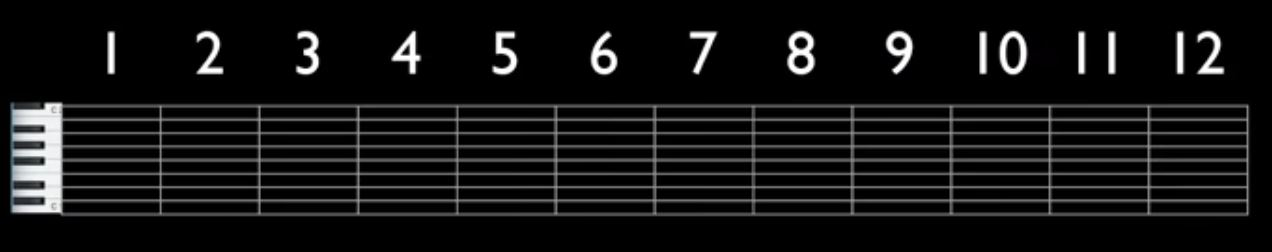

In [2]:
url = 'https://user-images.githubusercontent.com/58672183/74614033-388fca80-50e2-11ea-8885-693488aec261.JPG'
IPython.display.Image(url, width = 1000)

Here is an example of a note combination on that same keyboard.

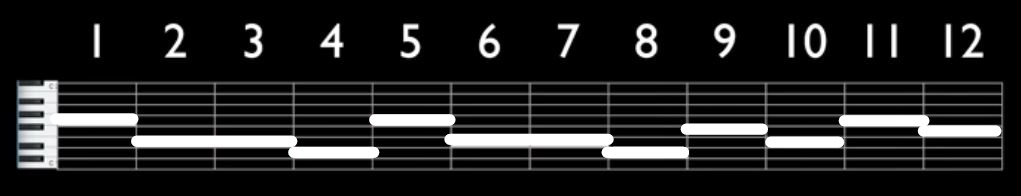

In [4]:
url = 'https://user-images.githubusercontent.com/58672183/74671016-4859ee00-5178-11ea-83bf-89d1bb89005f.jpg'
IPython.display.Image(url, width = 1000)

By Riehl's estimates, there are 8 raised to the 12th power possible melodies in existence.

$$8^{12} = 68,719,476,736$$

~69 billion may seem like a lot more possible melodies than the above picture may initially let on, but let's consider how many songs are out there.
   
    - Apple Music claims to have 50 million songs in its catalog
    - Spotify claims to have over 35 million songs in its catalog
    - Spotify, as of April 2019, claims to be adding 40,000 tracks every day to its catalog
   
It's a absurd amount of a music, and indeed an even more absurd amount of melodies as many melodies make up a single song.

You may be thinking, "What's the big deal? There are billions of melodies in existence and only an order of millions of songs. Surely, you can just write melodies that don't exist?

Well, theoretically you are correct. There are plenty of melodies that have not yet been written by a human. (Note: I say by a human because Riehl explains that his friend wrote a program that created all of the possible melodies in existence for fun.) The more poignant question is then: how is it that songwriters are getting sued for melody infringement? Are they are all musical thieves?

***The Birthday Problem***

The problem framed above has many similarities to the classic birthday problem. It goes like this: If there are 20 (Or however many) people in a room, what is the probablity that at least 2 of them share the same birthday? Many people significantly underestimate the probability of this occuring. It seems logical that there would need to be at least 365/2 people in the room for there to be a good chance two will share a birthday. 

As it turns out, you only need 23 people in the room for there to be a 50% probablity 2 of them share the same birthday.
The chart below gives probabilities at differing numbers of people.

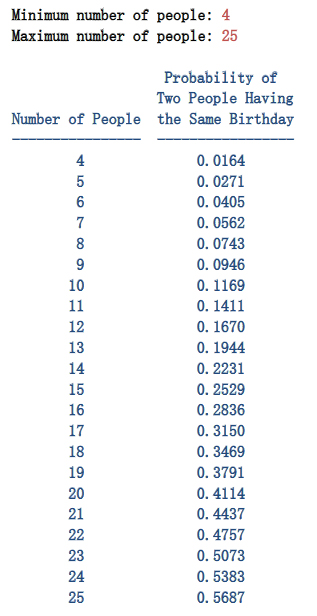

In [52]:
url = 'https://user-images.githubusercontent.com/58672183/74615366-1603ae80-50ee-11ea-8534-57974e4ea324.png'
IPython.display.Image(url, width = 250)

The way this is derived is actually a little bit simpler than one may think too. It's much easier to view this as: _how probable is it that two people don't share the same birthday?_ (364/365) than _how probable is it that two people do share the same birthday?_

If you know the probablity that two people, a single pair, don't share the same birthday, you can then scale up and calculate the probablity that each pair of people in the room don't share the same birthday. So, among two people, there is one pair, among three people, there are three unique pairs of people, and among 4 people, there are 6 unique pairs of people. We can continue this pattern so:

    - 5 people: 10 unique pairs of people
    - 6 people: 15 unique pairs of people
    - 7 people: 21 unique pairs of people
    
There is an easy way of expressing this mathematically. It is the called the choose function. In our use case of calculating pairs of people possible in a group of n people, it looks like this:

$$Possible Pairs=\frac{n!}{2!(n-2)!}$$

So if we raise the probability of two people not sharing the same birthday (364/365) to the number of possible pairs of people in the room, we get the probability that no two people in the room share the same birthday. To get the probability of any two people in the room sharing the same birthday, we take the complement of the probability that no two people share the same birthday. 

For example, the expression below will give you the probability that two people share a birthday in a room of 20 people.

$$1 - [(364/365)^{\frac{20!}{2!(20-2)!}}]$$

The problem of randomly reproducing a past melody is actually very similar but on a larger scale. Imagine the people in the room are melodies and the birthdays are the specific notes that make up the melody.


***The Melody Problem***

If we wanted to go about calulating probablities for randomly reproducing a past melody, we could go and use the same formula from the birthday problem. But instead of 365 days, we have now 8^12 (68,719,476,736) melodies. Thus, the probablity of there being one pair of repeated melodies among a group n randomly produced melodies is:

$$1 - [(\frac{8^{12} - 1}{8^{12}})^{\frac{n!}{2!(n-2)!}}]$$

For better idea of how large n needs to be to get certain probalities, here is a short table:

    n = 37,164 1% chance of a repeated melody
    n = 120,329 10% chance of a repeated melody
    n = 198,832 25% chance of a repeated melody
    n = 308,633 50% chance of a repeated melody
    n = 436,472 75% chance of a repeated melody
    n = 795,521 99% chance of a repeated melody
 
In other words, within a list of 'merely' 800,000 random melodies, it's almost a certainty that at least two of them will be the same. This is a remarkable result considering that while creating 800,000 melodies, we have made, at maximum, 
only 0.0012% (800,000 / 8^12) of the possible melodies in existence.    
    
This result is certainly even more unintuitive than the birthday problem result from before. I think a good way to comprehehend the result is to think about this converse problem: If one were to randomly produce 8^12 melodies, what are the chances that one would randomly produce exactly one of all 8^12 possible melodies? Intuitively, this probability is so small, it's almost negligible. It can be calculated exactly though; I leave it as an exercise for the reader!

***Simulation***

It's nice to be able to calculate probabilities exactly, but sometimes we need to check a theoretical result with a real world simulation just to ground ourselves.

In [1]:
from random import seed
from random import randint
import random
from matplotlib import pyplot
import IPython

I went about and made a simulation of the scenario described above. We will randomly produce a list of n numbers from 1 to 8^12, each number representing a unique possible melody. We will see what percentage of lists produced contain duplicates for different values of n. 

In [55]:
#This function makes a list of length n of random numbers between 1 and 8^12
def make_random_list(n):
    list_of_values = []
    for i in range(n):
        value = randint(1, 8**12 + 1)
        list_of_values.append(value)  
    return list_of_values

In [56]:
#This function returns false if there are no duplicates in the input list and true if there are duplicates in the input list
def is_there_duplicate(list_of_values):
    if len(set(list_of_values)) == len(list_of_values):
        return False
    if len(set(list_of_values)) != len(list_of_values):
        return True
    

In [57]:
#This loops through lists of different lengths and sees what percentage of them contain duplicates
percents = []
u_values = []
for u in range(50000,800000,50000):#This is a loop of list sizes. It goes from 50,000 to 750,000 with a step size of 50,000
    u_values.append(u)
    trues = 0
    falses = 0
    
    for i in range(100):#We make 100 different random lists for each list size
        n_list = make_random_list(u)
        if is_there_duplicate(n_list) == True:
            trues = trues + 1
        else:
            falses = falses + 1

    percent = trues/(trues+falses) #This calculates the percentage of lists that contained duplicates for each list size     
    percents.append(percent)

After running the simulation, we can see exactly what percentage of lists of each size contained duplicates.

In [63]:
import pandas as pd

In [66]:
df = pd.DataFrame(columns = ['Size of List Produced','% of Lists Produced Containing Duplicates'])

In [71]:
df['Size of List Produced'] = u_values
df['Proportion of Lists Produced Containing Duplicates'] = percents

In [75]:
df

,Size of List Produced,Proportion of Lists Produced Containing Duplicates
0,50000,0.02
1,100000,0.10
2,150000,0.16
3,200000,0.20
4,250000,0.27
5,300000,0.52
6,350000,0.63
7,400000,0.66
8,450000,0.79
9,500000,0.86


If you compare the calculated probabilites from before with the values from our simulation, you can see that they match up quite well. This confirms the calculations we did.

This is a graph of the same table from above.

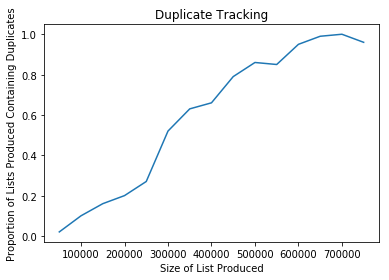

In [91]:
pyplot.plot(u_values, percents)
pyplot.title('Duplicate Tracking')
pyplot.ylabel('Proportion of Lists Produced Containing Duplicates')
pyplot.xlabel('Size of List Produced')
pyplot.show()

It's great to see what percentage of lists produced contain duplicates, but something even more important might be how many duplicates there are. So, here is another simulation where I count the number of duplicates in randomly produced lists of numbers between 1 and 8^12 for differing sizes.

In [93]:
from collections import defaultdict

In [99]:
for q in range(1000000,10000000,500000):
    new_list = make_random_list(q)
    num_occurences = defaultdict(list)
    for num in new_list:
        num_occurences[num].append(num)
    for num in num_occurences:
        length = len(num_occurences.get(num))
        num_occurences[num] = length
    num_duplicates = 0
    for num in num_occurences:
        if num_occurences[num] > 1:
            num_duplicates = num_duplicates + 1
    print('The list of size',q,'has',num_duplicates,'duplicates')

The list of size 1000000 has 7 duplicates
The list of size 1500000 has 18 duplicates
The list of size 2000000 has 37 duplicates
The list of size 2500000 has 47 duplicates
The list of size 3000000 has 61 duplicates
The list of size 3500000 has 97 duplicates
The list of size 4000000 has 115 duplicates
The list of size 4500000 has 143 duplicates
The list of size 5000000 has 191 duplicates
The list of size 5500000 has 224 duplicates
The list of size 6000000 has 295 duplicates
The list of size 6500000 has 281 duplicates
The list of size 7000000 has 345 duplicates
The list of size 7500000 has 407 duplicates
The list of size 8000000 has 443 duplicates
The list of size 8500000 has 498 duplicates
The list of size 9000000 has 597 duplicates
The list of size 9500000 has 655 duplicates


Before we even reach 10,000,000 million random melodies, we already are observing hundreds of duplicate melodies. If we think back to the statistics before about how many songs are being produced every single day, we can start to get a sense of how common these duplicate melodies must be in the real world. Keep in mind, this is despite the fact that humans have not even come close to writing all possible melodies!

***Conclusion***

Let's think back to our original question: How often will songwriters accidentally create a melody that has already been created? The answer seems to be it will be quite common if we consider all of the music writing that is currently happening. It's almost paradoxical to think we have not yet written all possible melodies, yet we continue to duplicate old melodies just by chance. It's as if we're bad at spreading around the musical landscape.

In the real world, melodies are not randomly produced as they were in my simulations. There are defintiely some groups of melodies that will sound better. These groups will be naturally be more prone to having duplicates of them made. The million dollar question in melody infingement cases is the intent. Was it a conscious or unconscious act of stealing a melody you have heard before? This is probably only something the songwriter will truly know. The math though says we should maybe give the songwriter the benefit of the doubt in these cases. The simulations showed just how common a duplicate melody can be in our wide world of music. With so many melodies out there, it's natural some of them will be the same. It just seems to be that sometimes two very popular songs happen to use the same melody and it becomes a big court battle. Hopefully, one day we will move past all of the litigation and live in a more cooperative creative commons.